# Predictions in NY using an ARIMA model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Counties_Pred import Build_Data,Build_Training_Data,GridSearch,Prediction

## 1. Building the DataFrame in the right format

In [2]:
path = 'C:/Users/louis/OneDrive/Documents/GitHub/COVIDMINDER/'
pathdata = path + 'data/csv/time_series/covid_NY_TS_plot.cases.csv'
pathDiabetes = path + 'data/csv/time_series/NY_counties_diabetes.csv'
Regions = pd.read_csv(path + 'data/csv/time_series/NY_counties_regions.csv', index_col='County')

The first function, Build_Data, produces the DataFrame on which we will do the predictions, by reading the csv file in 'pathdata'. The produced DataFrame, Regions_Daily_Cases, has days as an index, and a column for each region, and gives the daily cases per 100k for said region in said day. It also returns DataPlot, a DataFrame version of covid_NY_TS_plot.cases.csv, that will be used to get the population data, in the next function

In [3]:
DataPlot,Regions_Daily_Cases=Build_Data(pathdata,Regions)
display(Regions_Daily_Cases)

,New York State,Capital,Western New York,New York City,Southern Tier,Central New York,Finger Lakes,North Country,Mid-Hudson,Mohawk Valley,Tug Hill Seaway,Long Island
date,,,,,,,,,,,,
2020-03-04 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-05 00:00:00+00:00,0.056468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.825751,0.000000,0.000000,0.000000
2020-03-06 00:00:00+00:00,0.094114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.928970,0.000000,0.000000,0.000000
2020-03-07 00:00:00+00:00,0.305869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.851287,0.000000,0.000000,0.000000
2020-03-08 00:00:00+00:00,0.447039,0.000000,0.000000,0.011843,0.000000,0.000000,0.000000,0.000000,7.534978,0.000000,0.000000,0.000000
2020-03-09 00:00:00+00:00,0.616444,0.000000,0.000000,0.094745,0.000000,0.000000,0.000000,0.000000,9.083262,0.000000,0.000000,0.884588
2020-03-10 00:00:00+00:00,0.654089,0.000000,0.000000,0.165804,0.000000,0.000000,0.000000,0.000000,9.083262,0.000000,0.000000,1.032019
2020-03-11 00:00:00+00:00,0.983486,0.000000,0.000000,0.521098,0.000000,0.000000,0.000000,0.000000,8.793722,0.000000,0.000000,0.826726
2020-03-12 00:00:00+00:00,1.430525,0.000000,0.000000,0.994823,0.000000,0.000000,0.000000,0.000000,10.134314,0.000000,0.000000,1.775937


In [4]:
display(DataPlot)

cases            Region    Color  \
date                 County                                              
2020-03-04T00:00:00Z New York State      11    New York State  #7a7a7a   
                     Westchester         10        Mid-Hudson  #91bdf0   
2020-03-05T00:00:00Z New York State      23    New York State  #7a7a7a   
                     Westchester         18        Mid-Hudson  #91bdf0   
2020-03-06T00:00:00Z New York State      31    New York State  #7a7a7a   
                     New York            11     New York City  #c8ff00   
                     Westchester         19        Mid-Hudson  #91bdf0   
2020-03-07T00:00:00Z New York State      76    New York State  #7a7a7a   
                     New York            11     New York City  #c8ff00   
                     Westchester         57        Mid-Hudson  #91bdf0   
2020-03-08T00:00:00Z New York State     106    New York State  #7a7a7a   
                     Nassau               5       Long Island  #ff64a5   
                     New York            12     New York City  #c8ff00   
                     Westchester         83        Mid-Hudson  #91bdf0   
2020-03-09T00:00:00Z New York State     142    New York State  #7a7a7a   
                     Nassau              17       Long Island  #ff64a5   
                     New York            19     New York City  #c8ff00   
                     Westchester         98        Mid-Hudson  #91bdf0   
2020-03-10T00:00:00Z New York State     150    New York State  #7a7a7a   
                     Nassau              19       Long Island  #ff64a5   
                     New York            25     New York City  #c8ff00   
                     Westchester         98        Mid-Hudson  #91bdf0   
2020-03-11T00:00:00Z New York State     220    New York State  #7a7a7a   
                     Nassau              28       Long Island  #ff64a5   
                     New York            55     New York City  #c8ff00   
                     Rockland             6        Mid-Hudson  #91bdf0   
                     Suffolk              6       Long Island  #ff64a5   
                     Westchester        121        Mid-Hudson  #91bdf0   
2020-03-12T00:00:00Z New York State     327    New York State  #7a7a7a   
                     Nassau              41       Long Island  #ff64a5   
...                                     ...               ...      ...   
2020-06-28T00:00:00Z New York        214750     New York City  #c8ff00   
                     Niagara           1226  Western New York  #979797   
                     Oneida            1586  Central New York  #d7e1be   
                     Onondaga          2816  Central New York  #d7e1be   
                     Ontario            256      Finger Lakes  #b4ffaa   
                     Orange           10713        Mid-Hudson  #91bdf0   
                     Orleans            281  Western New York  #979797   
                     Oswego             195  Central New York  #d7e1be   
                     Otsego              84     Mohawk Valley  #ffff00   
                     Putnam            1323        Mid-Hudson  #91bdf0   
                     Rensselaer         551           Capital  #00ffff   
                     Rockland         13576        Mid-Hudson  #91bdf0   
                     St. Lawrence       218   Tug Hill Seaway  #e978ef   
                     Saratoga           548           Capital  #00ffff   
                     Schenectady        792           Capital  #00ffff   
                     Schoharie           58     Mohawk Valley  #ffff00   
                     Schuyler            12      Finger Lakes  #b4ffaa   
                     Seneca              69      Finger Lakes  #b4ffaa   
                     Steuben            266      Finger Lakes  #b4ffaa   
                     Suffolk          41306       Long Island  #ff64a5   
                     Sullivan          1451        Mid-Hudson  #91bdf0   
                     Tioga              14

## 2. Building the Data to train the model on

The second function builds data to train our ARIMA models, indeed, to account for the relatively few data we have, we have decided to put the regional data one after the other, to have something to train a single model over every data available. It includes the exogenous variables, and the argument v, which decides how much days to leave aside for these data (it needs to be the same as the v in the next function, since the grid search will evaluate results on the days left aside).

When exog=False, there is no need for the argument pathDiabetes, and it does not return anything but 'Values'.

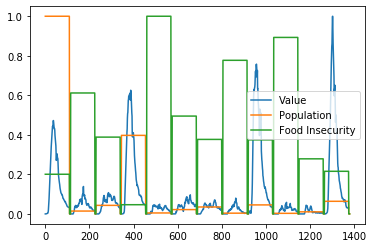

In [5]:
Values, Pop, Food_Insecure, Dict_Pop, Dict_Food_Insec = Build_Training_Data(DataPlot, Regions_Daily_Cases, pathDiabetes,
                                                                                Regions, exog=True, v=7)
plt.figure()
plt.plot(np.array(Values)/max(Values),label='Value')
plt.plot(np.array(Pop)/max(Pop),label='Population')
plt.plot(np.array(Food_Insecure)/max(Food_Insecure),label='Food Insecurity')
plt.legend()
plt.show()

## 3. Grid Search

The Grid Search function searchs for the best parameters by using v days for validation. It returns the values of the parameters, aswell as its score.

In [6]:
Params, results = GridSearch(Regions=Regions,  Regions_Daily_Cases=Regions_Daily_Cases, Values=Values,Food_Insecure= Food_Insecure, Pop=Pop, Dict_Pop=Dict_Pop,Dict_Food_Insec= Dict_Food_Insec, exog=True,
                                 plot=False, v=7)

Training Failed for parameters :
1 1 2
Training Failed for parameters :
2 1 1
Training Failed for parameters :
2 0 2
Training Failed for parameters :
2 1 2
Training Failed for parameters :
2 1 3
Training Failed for parameters :
3 0 2
Training Failed for parameters :
3 1 2
Training Failed for parameters :
3 0 3
Training Failed for parameters :
4 0 2
Training Failed for parameters :
4 1 2
Training Failed for parameters :
4 2 2
Best distance :  1.7149568572223222
Best params :  (1, 0, 3)


## Prediction
Finally, the Prediction function returns the prediction of the model as a dataframe, for the length of the data, with v more days. In the following exemple, we have a prediction on a week. The output DataFrame is on the expected format for COVIDMINDER, and has 5 columns : the usual region and day, as well as 'mean' : the actual prediciton, and 'mean_ci_upper' and 'mean_ci_lower', the upper and lower bounds of a 95% confidence interval for the predictions.  

In [7]:
Values, Pop, Food_Insecure, Dict_Pop, Dict_Food_Insec = Build_Training_Data(DataPlot, Regions_Daily_Cases, pathDiabetes,
                                                                                Regions, exog=True, v=0)
#For the prediction, we train on the whole dataset, therefore need a new 'Value' data
Pred = Prediction(Regions, Regions_Daily_Cases, Values, Params, Food_Insecure, Pop, Dict_Pop, Dict_Food_Insec,exog=True, plot=False,v=7)
display(Pred)

,region,mean,mean_ci_upper,mean_ci_lower
date,,,,
2020-03-04 00:00:00+00:00,New York State,70.078979,306.730485,-166.572528
2020-03-05 00:00:00+00:00,New York State,0.295993,22.023622,-21.431635
2020-03-06 00:00:00+00:00,New York State,0.472066,20.903332,-19.959200
2020-03-07 00:00:00+00:00,New York State,0.537208,20.906986,-19.832571
2020-03-08 00:00:00+00:00,New York State,0.831172,21.155993,-19.493648
2020-03-09 00:00:00+00:00,New York State,0.915440,21.158837,-19.327957
2020-03-10 00:00:00+00:00,New York State,1.108555,21.351707,-19.134598
2020-03-11 00:00:00+00:00,New York State,1.084597,21.327704,-19.158509
2020-03-12 00:00:00+00:00,New York State,1.511767,21.753051,-18.729518
